## ***`<One-Way ANOVA>`***: **Compares the `MEANS` of `ONE` Continuous Dependent Variable based on `THREE or MORE` groups of `ONE` Categorical Variable;** 

## ***`<Two-Way ANOVA>`***: **Compares the `MEANS` of `ONE` Continuous Dependent Variable based on `THREE or MORE` groups of `TWO` Categorical Variables;** 

## ***`01: RELEVANT IMPORTS & LOADING A DATASET`***

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns

In [2]:
# Load Dataset
diamonds = sns.load_dataset('diamonds', cache = False)
diamonds.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
36482,0.32,Ideal,F,IF,60.9,57.0,943,4.42,4.45,2.70
36356,0.34,Very Good,F,VVS1,61.0,56.0,939,4.52,4.53,2.76
20991,1.03,Premium,E,VVS2,59.7,56.0,9205,6.64,6.56,3.94
51028,0.70,Premium,G,VS2,58.2,60.0,2328,5.84,5.78,3.38
10895,1.02,Premium,H,SI1,62.9,59.0,4884,6.41,6.38,4.02
50707,0.80,Premium,J,VS1,60.8,59.0,2292,6.00,5.94,3.63
53228,0.71,Good,D,SI1,64.0,56.0,2641,5.59,5.63,3.59
33613,0.31,Very Good,G,SI1,60.4,58.0,462,4.39,4.42,2.66
39062,0.52,Very Good,E,SI2,64.0,55.0,1059,5.07,5.11,3.26
48832,0.53,Ideal,F,VVS2,62.7,56.0,2030,5.16,6.20,3.25


## ***`02: DATA CLEANING`***
#### **As we are focusing on ONE-WAY & TWO-WAY ANOVA, our dataset needs `ONE CONTINUOUS VARIABLE` and upto `TWO CATEGORICAL VARIABLES`.**

In [3]:
# Mandatory Data Inspection
print(f"Data Shape: {diamonds.shape}\n")
print(f"Data Information:\n{diamonds.info()}\n")
print(f"Data Statistics:\n{diamonds.describe()}\n")
print(f"Diamond Grade Counts:\n{diamonds['color'].value_counts()}\n") ## Check how many diamonds are there for each color grade
print(f"Data Missing Values:\n{diamonds.isnull().sum()}")

Data Shape: (53940, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
Data Information:
None

Data Statistics:
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.43

In [4]:
# Subset for colorless Diamonds
colorless = diamonds[diamonds['color'].isin(['E', 'F', 'H', 'D', 'I'])]

# Select only color and price columns, and reset index
colorless = colorless[['color', 'price']].reset_index(drop = True)

### ***<>'G' excluded - as there are many more of them;***

### ***<>'J' excluded - as there were significantly fewer of them;***

### The goal here is to focus on ANOVA, not `Data Cleaning` or `Variable Selection`;

In [5]:
# Remove dropped categories of diamond color
colorless.color = colorless.color.cat.remove_categories(['G', 'J'])

# Check that the dropped categories have been removed
colorless['color'].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [6]:
# Import Math Package
import math

# Take the logarithm of the price, and insert it as the THIRD column
colorless.insert(2, "Log_Price", [math.log(price) for price in colorless['price']])

In [7]:
# View the latest dataset with necessary changes made
print(colorless.sample(10))

      color  price  Log_Price
14723     E   8480   9.045466
32312     D   1452   7.280697
38515     D    550   6.309918
19301     I  16149   9.689613
3351      D   3601   8.188967
1666      E   3115   8.043984
4393      E   3888   8.265650
23897     H    802   6.687109
13102     D   6981   8.850947
35928     I   2034   7.617760


### ***<> 'INSERT() Function' - Allows us to specify the location of a new column with a column number.The argument starts counting at 0. Since we specified 2, the new 'Log_Price' column will be the 3rd column;***

### ***<> We use 'DROPNA()' function to drop the rows with missing values;***

### ***<> Setting the 'INPLACE' argument to TRUE means that we do not have to save the dataframe as a new variable;***

### ***<> Reset the index using the REST_INDEX() function - to reset the index column to account for the rows we just dropped;***

### ***<> The INPLACE argument works the same as it did for the DROPNA() function;***

### ***<> The DROP argument prevents us from creating a new column with the old index numbers preseved;*** 

In [8]:
# Drop Rows with Missing Values
colorless.dropna(inplace = True)

# Reset Index
colorless.reset_index(inplace = True, drop = True)

In [9]:
# Examine first 5 Rows of cleaned data set
colorless.head()

,color,price,Log_Price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [10]:
# Save to 'diamond.csv'
colorless.to_csv('diamonds.csv', index = False, header = list(colorless.columns))

### ***<> The code creates a new '.csv' file of the 'colorless' dataframe, and names it `diamonds.csv`;***

### ***<> The `INDEX` argument tells the fucntion whether or not we want to save the index column as a column in the '.csv' file;***

### ***<> The `HEADER` argument tells the function what the names of the columns should be;***

## ***`03: ONE-WAY ANOVA`*** 
#### **To run ONE-WAY ANOVA, we first load in the data, and save it as a variable called 'DIAMOND', and then examine it using the 'HEAD()' fuction;**

In [11]:
# Save 'diamonds.csv' as a variable called diamonds
diamonds = pd.read_csv('diamonds.csv')

In [12]:
# Examine first 5 rows of diamonds data set
diamonds.head()

,color,price,Log_Price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


#### **<> `ONE-WAY ANOVA` helps us better understand the relationship between a `CATEGORICAL VARIABLE` and a `CONTINUOUS VARIABLE`;**

#### **<> We'll do basic EDA by creating a boxplot using the `BOXPLOT()` function from the `SEABORN` package;**

#### **<> Based on the plot, we can observe that there is a lot of overlap in the distribution of `LOG_PRICE` for each colour of diamond. But we can't tell yet if they are statistically significantly different;**

<Axes: xlabel='color', ylabel='Log_Price'>

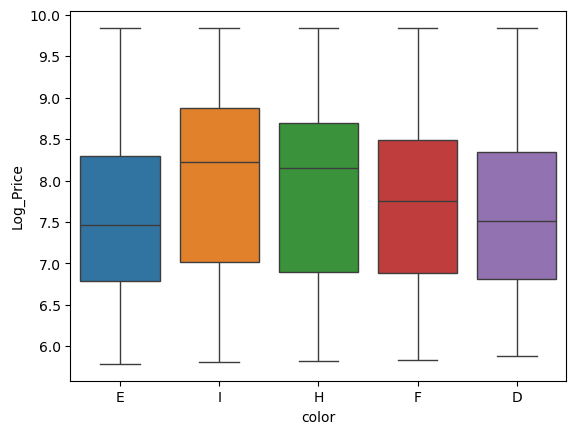

In [13]:
# Create BOXPLOT to show distribution of price by color grade
sns.boxplot(x = 'color', y = 'Log_Price', data = diamonds, hue = 'color')

#### **<> In order to run ANOVA, we need to create a REGRESSION MODEL, importing `STATSMODEL.API` package and `OLS()` fucntion;**

In [14]:
# Importing Required Packages
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### **<> Create a simple `LINEAR REGRESSION` model where the `X` variable is `COLOR`, which we will code as categorical using `C()`;** 

#### **<> Then we `FIT()` the model to the data, and generate `MODEL SUMMARY`;**

In [15]:
# Construct Simple Linear Regresisopn Model, and FIT the model
model = ols(formula = 'Log_Price ~ C(color)', data = diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          3.61e-225
Time:                        14:11:39   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ***-> Based on the `MODEL SUMMARY` table, the colour grades associated with `BETA COEFFICIENTS` all have a `P-VALUE > 0.05` (P > |t|). But we can't be sure that there is a *significant price difference* between the various color grades. This is where ONE-WAY ANOVA comes in!***

#### ***NULL HYPOTHESIS***
#### **H0: price_d = price_e = price_f = price_h = price_i**
#### *-> `There is no difference in the price of diamonds based on color grade`*

#### ***ALTERNATIVE HYPOTHESIS***
#### **H1: not price_d = price_e = price_f = price_h = price_i**
#### *-> `There is a difference in the price of diamonds based on color grade`*

In [16]:
# Run One-Way ANOVA
print(f"Type-1 ANOVA:\n{sm.stats.anova_lm(model, typ = 1)}\n")
print(f"Type-2 ANOVA:\n{sm.stats.anova_lm(model, typ = 2)}\n")
print(f"Type-3 ANOVA:\n{sm.stats.anova_lm(model, typ = 3)}")

Type-1 ANOVA:
               df        sum_sq     mean_sq           F         PR(>F)
C(color)      4.0   1041.690290  260.422572  264.987395  3.609774e-225
Residual  39835.0  39148.779822    0.982773         NaN            NaN

Type-2 ANOVA:
                sum_sq       df           F         PR(>F)
C(color)   1041.690290      4.0  264.987395  3.609774e-225
Residual  39148.779822  39835.0         NaN            NaN

Type-3 ANOVA:
                  sum_sq       df              F         PR(>F)
Intercept  393066.804852      1.0  399956.684283   0.000000e+00
C(color)     1041.690290      4.0     264.987395  3.609774e-225
Residual    39148.779822  39835.0            NaN            NaN


#### **<> We use the `ANOVA_LM()` function from the `STATSMODELS.STATS` package. The function required a fitted regression model, and for us to specify the type of ANOVA: 1, 2, or 3;** 

#### **<> The `P-VALUE` i.e., PR(>F) is very small, we can `REJECT` the `NULL HYPOTHESIS` that the MEAN of the price is the same for all diamond color grades;**

#### **<> The type of ANOVA and the number of ways of an ANOVA are two distinct concepts, `TYPE(TYP in STATSMODELS.STATS.ANOVA.ANOVA_LM())` refers to how the sums of squares (these quantities are the building blocks for ANOVA) are calculated, while `K-WAY` means that there are K categorical factors in the analysis;**

## ***`04: DATA CLEANING - II`***
#### **We will prepare the second dataset so we can perform a `TWO-WAY ANOVA`, which requires `TWO CATEGORICAL VARIABLES`. We start with the same diamonds dataset from the `SEABORN` package.**

In [17]:
# Import diamonds data set from seaborn package 
diamonds = sns.load_dataset('diamonds', cache = False)

# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### **<> We start by selecting the columns of interest: `COLOR`, `CUT`, and `PRICE`. Then we `SUBSET` only for certain color grades and `REMOVE` the dropped colors from the list of categories using the REMOVE_CATEGORIES() function.** 

#### **<> Next, we SUBSET for specific diamond cuts: `IDEAL`, `PREMIUM`, and `VERY GOOD`, and REMOVE the dropped cuts from the list of categories.**

#### **<> Next we REMOVE `rows with missing data`, and RESET the index.**

#### **<> Lastly, we ADD in a column for the logatihm of the `PRICE`.**

In [18]:
# Subset for color, cut and price columns
diamonds2 = diamonds[['color', 'cut', 'price']]

# Only include colorless diamonds
diamonds2 = diamonds2[diamonds2['color'].isin(['E', 'F', 'H', 'D', 'I'])]

# Drop removed colors, G and J
diamonds2.color = diamonds2.color.cat.remove_categories(['G', 'J'])

# Only include ideal, premium, and very good diamonds
diamonds2 = diamonds2[diamonds2['cut'].isin(['Ideal', 'Premium', 'Very Good'])]

# Drop removed cuts
diamonds2.cut = diamonds.cut.cat.remove_categories(['Good', 'Fair'])

# Drop NaNs
diamonds2.dropna(inplace = True)

# Reset Index
diamonds2.reset_index(inplace = True, drop = True)

# Add column for logarithm of price
diamonds2.insert(3, 'Log_Price', [math.log(price) for price in diamonds2['price']])

In [19]:
# Examine the Data Set
print(f"Top FIVE Rows:\n{diamonds2.head()}\n")

print(f"Random FIVE Rows:\n{diamonds2.sample(5)}")

Top FIVE Rows:
  color        cut  price  Log_Price
0     E      Ideal    326   5.786897
1     E    Premium    326   5.786897
2     I    Premium    334   5.811141
3     I  Very Good    336   5.817111
4     H  Very Good    337   5.820083

Random FIVE Rows:
      color        cut  price  Log_Price
14689     H  Very Good  11527   9.352447
25808     F    Premium   1110   7.012115
6167      H      Ideal   4662   8.447200
25461     E      Ideal   1080   6.984716
15218     F      Ideal  12608   9.442087


#### ***`<>` We save the dataset as a ".CSV()" file again using the "TO_CSV()" fucntion;*** 

In [20]:
# Save as "DIAMONDS2.CSV" 
diamonds2.to_csv('diamonds2.csv', index = False, header = list(diamonds2.columns))
# d2 = pd.read_csv('diamonds.csv')
# d2.sample(5)

## ***`05: TWO-WAY ANOVA`*** 
#### **This regression model includes TWO categorical variables: 'COLOR' & 'CUT', and a variable to account for the interaction between `COLOR` and `CUT`. The interaction is denoted using  `:` symbol.**

In [21]:
# Load the Dataset
diamonds2 = pd.read_csv('diamonds2.csv')

# Examine the Random TEN rows of the DataSet
diamonds2.sample(10)

,color,cut,price,Log_Price
28176,H,Very Good,1429,7.264730
17484,E,Ideal,658,6.489205
8853,H,Very Good,5620,8.634087
25962,E,Very Good,493,6.200509
26427,E,Ideal,1181,7.074117
18265,D,Very Good,690,6.536692
10058,D,Ideal,6299,8.748146
5912,F,Premium,4586,8.430763
4232,E,Ideal,4086,8.315322
19991,E,Ideal,767,6.642487


In [22]:
# Construct a Multiple Linear Regression with an interaction term between color and cut
model2 = ols(formula = 'Log_Price ~ C(color) + C(cut) + C(color) : C(cut)', data = diamonds2).fit()

# Get Summary Statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 03 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:11:41   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ***`<>` Based on the Model Summary Table, many of the color grades and cuts associated with beta coefficients have a P-VALUE of less than 0.5 (check P > |t| column);***

#### ***`<>` Additionally, some of the interactions also seem statistically significant. We will use TWO WAY ANOVA to examine furhter the relationship between `PRICE` and the `TWO` categories of `COLOR` grade and `CUT`;***

#### ***`<>` First, we have to state our `THREE PAIRS of Null and Alternative Hypothesis`*** 

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Null Hypothesis (Color)**

$$H_0: price_D=price_E=price_F=price_H=price_I$$

-> There is no difference in the price of diamonds based on color.


#### **Alternative Hypothesis (Color)**

$$H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$$

-> There is a difference in the price of diamonds based on color.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Null Hypothesis (Cut)**

$$H_0: price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

-> There is no difference in the price of diamonds based on cut.


#### **Alternative Hypothesis (Cut)**

$$H_1: \text{Not } price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

-> There is a difference in the price of diamonds based on cut.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Null Hypothesis (Interaction)**

$$H_0: \text{The effect of color on diamond price is independent of the cut, and vice versa.}$$


#### **Alternative Hypothesis (Interaction)**

$$H_1: \text{There is an interaction effect between color and cut on diamond price.}$$

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **<> The syntax of Two-Way ANOVA is the same as for a One-Way ANOVA. We will continue to use the `ANOVA_LM()` fucntion from `STATSMODEL.STATS`;**

In [23]:
# Run Two-Way ANOVA
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [24]:
sm.stats.anova_lm(model2, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [25]:
sm.stats.anova_lm(model2, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,157578.043681,1.0,161268.910012,0.000000e+00
C(color),319.145817,4.0,81.655250,4.134649e-69
C(cut),100.144107,2.0,51.244864,5.987341e-23
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


#### ***`<>` Since all of the P-VALUES (Column PR(>F)) are VERY SMALL, we can `REJECT All THREE NULL Hypothesis`;***

## ***`06: ANOVA POST-HOC TEST (Part - 2)`*** 
#### **The focus is on post hoc tests after One_Way ANOVA using `STATSMODELS` packages in Python.**

#### ***`-->> ONE - WAY ANOVA:`*** *Compares the MEANS of `ONE Continuous Dependent Variable` based on `THREE or MORE groups of ONE Categorical Variable`;* 

#### ***`-->> POST - HOC TEST:`*** *Performs a PAIRWISE comparison between all available groups while controlling for the ERROR RATE;* 

### ***`<Relevant Imports:>` Start by importing the `STATSMODELS` package and the `OLS` fucntion so we can construct a Simple Linear Regression Model. Next, we load a dataset from ONE-WAY ANOVA;*** 

In [26]:
# Import StatsModels Package and OLS function
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load in the DataSet from One-Way ANOVA
diamonds = pd.read_csv('diamonds.csv')

### ***`<One-Way ANOVA:>`*** *Steps to follow:*

#### **`01:` Build a Simple Linear Regression Model**

#### **`02:` Check the Results**

#### **`03:` Run One - Way ANOVA**


In [27]:
# Construct Simple Linear Regression Model, and Fit the Model
model = ols(formula = 'Log_Price ~ C(color)', data = diamonds).fit()

# Get Summary Statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          3.61e-225
Time:                        14:11:41   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Re-Run the ANOVA
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


#### ***`<>` Since the P-VALUE is VERY SMALL and we can REJECT the NULL Hypothesis that the MEAN PRICE is the same for ALL diamond color grades, we can continue on to run a POST HOC TEST.***

#### ***`<>` The post hoc test is useful because the ONE-WAY ANOVA does not tell us which colors are associated with different prices.***

### ***`<POST-HOC TEST:>`*** 

#### **`01:` There are many post-hoc tests that can be rum.**

#### **`02:` One of the most common ANOVA post hoc tests is the `TUKEY'S HSD TEST`.**

#### **`03:` We can import the `PAIRWISE_TUKEYHSD()` fucntion from the `STATSMODELS` package to reun the test.**


In [29]:
# Import Tukey's HSD Function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### ***`<>` Then we can run the test. The `ENDOG` variable specifies which variable is being compared across groups, which is `LOG_PRICE` in this case;***

#### ***`<>` Then the `GROUPS` variables indicates which variable holds the groups we are comparing, which is `COLOR`;***

#### ***`<>` `ALPHA` tells the function the significance or confidence level, which we will set to `0.05`(a typical Confidence Level of 95%);***

In [30]:
# Run Tukey's HSD post-hoc test for One-Way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = diamonds['Log_Price'], groups = diamonds['color'], alpha = 0.05)

In [31]:
# Get Results (Pair-Wise Comparison)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


### ***`<>` Each row represents a pairwise comparison between the `PRICES` of `TWO` diamond `COLOR` grades. The `REJECT` columns tell us which null hypothesis `WE CAN REJECT`;***

### ***`<>` Based on the values in the column, we can REJECT each null hypothesis, except when comparing `D` and `E` colour diamonds. We `CANNOT REJECT THE NULL HYPOTHESIS` that the diamond prices of D and E colour diamonds are the same;***

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 1: D vs. E**
$H_0: price_D=price_E$

The price of D and E color grade diamonds are the same.

$H_1: price_D \neq price_E$

The price of D and E color grade diamonds are not the same.

**Result:** We *cannot* reject the null hypothesis that the price of D and E color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 2: D vs. F**
$H_0: price_D=price_F$

The price of D and F color grade diamonds are the same.

$H_1: price_D \neq price_F$

The price of D and F color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and F color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 3: D vs. H**
$H_0: price_D=price_H$

The price of D and H color grade diamonds are the same.

$H_1: price_D \neq price_H$

The price of D and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and H color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 4: D vs. I**
$H_0: price_D=price_I$

The price of D and I color grade diamonds are the same.

$H_1: price_D \neq price_I$

The price of D and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and I color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 5: E vs. F**
$H_0: price_E=price_F$

The price of E and F color grade diamonds are the same.

$H_1: price_E \neq price_F$

The price of E and F color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and F color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 6: E vs. H**
$H_0: price_E=price_H$

The price of E and H color grade diamonds are the same.

$H_1: price_E \neq price_H$

The price of E and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and H color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 7: E vs. I**
$H_0: price_E=price_I$

The price of E and I color grade diamonds are the same.

$H_1: price_E \neq price_I$

The price of E and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and I color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 8: F vs. H**
$H_0: price_F=price_H$

The price of F and H color grade diamonds are the same.

$H_1: price_F \neq price_H$

The price of F and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of F and H color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 9: F vs. I**
$H_0: price_F=price_I$

The price of F and I color grade diamonds are the same.

$H_1: price_F \neq price_I$

The price of F and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of F and I color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--

#### **Test 10: H vs. I**
$H_0: price_H=price_I$

The price of H and I color grade diamonds are the same.

$H_1: price_H \neq price_I$

The price of H and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of H and I color grade diamonds are the same.

--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--||--<*>--


### ***`-->> Key Insights`***
#### ***`01: Color Significantly Impacts Price:`*** *The One-Way ANOVA confirms that there is a statistically significant difference in the mean price of diamonds across different color grades (p<0.001);*

#### ***`02: Cut Also Significantly Impacts Price:`*** *The Two-Way ANOVA shows that diamond cut is also a significant predictor of price (p<0.001);*

#### ***`03: Crucial Interaction Effect:`*** *The most powerful insight from the Two-Way ANOVA is the statistically significant interaction between color and cut (p<0.001). This means the effect of a diamond's color on its price depends on its cut, and vice-versa. For example, the price premium for an 'Ideal' cut over a 'Premium' cut may be different for a 'D' color diamond than for an 'H' color diamond;*

#### ***`04: 'D' and 'E' Colors Are Priced Similarly:`*** *The Tukey's HSD post-hoc test on the One-Way ANOVA results revealed that while most color grades have significantly different mean prices, there is no statistically significant price difference between 'D' and 'E' color diamonds (p=0.1169);*|

### ***`-->> Actionable Recommendations`***

#### ***`01: Develop an Interactive Pricing Model:`*** *A simple pricing model that just adds a premium for color and another for cut is insufficient. Create a more sophisticated pricing strategy or calculator that explicitly accounts for the interaction between specific color-cut combinations to maximize profitability and reflect true market value;*

#### ***`02: Refine Marketing and Sales Strategies:`*** 
**`2.1:`** *Market 'E' color diamonds as the "best value colorless" option, offering nearly indistinguishable quality from 'D' grade diamonds without a statistically significant price increase;*

**`2.2:`** *Train sales staff to leverage the nuance. They can highlight the prestige of a 'D' diamond while assuring customers that an 'E' offers visually identical quality for a similar price;*

#### ***`03: Optimize Inventory Management:`*** *Use the interaction insights to stock up on the most profitable or in-demand color and cut combinations. For instance, if 'Ideal' cut 'F' color diamonds fetch an unexpectedly high premium due to the interaction effect, inventory for this specific combination should be prioritized;*

#### ***`04: Conduct Deeper Post-Hoc Analysis:`*** *The current analysis stops after identifying the interaction. The next logical step is to perform a post-hoc test (like Tukey's HSD) on the Two-Way ANOVA results. This would pinpoint exactly which color-cut combinations are significantly different from others, providing granular data for pricing and inventory decisions. Visualizing these findings with an interaction plot would be highly effective;*